<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Inferred-s-and-mu-values" data-toc-modified-id="Inferred-s-and-mu-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inferred s and mu values</a></span></li></ul></li><li><span><a href="#Comparison-of-single-and-multiple-fitness-and-mutation-rates" data-toc-modified-id="Comparison-of-single-and-multiple-fitness-and-mutation-rates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of single and multiple fitness and mutation rates</a></span><ul class="toc-item"><li><span><a href="#Create-a-combined-dataframe" data-toc-modified-id="Create-a-combined-dataframe-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create a combined dataframe</a></span></li></ul></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [12]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

In [2]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [3]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [4]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

In [6]:
mCA_color_dict = {'+': gain_color, '-': loss_color, '=': neutral_color}

# Import data

## Inferred s and mu values

In [9]:
#s and mu values inferred from MLE - for individual mCAs
single_mCA_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
single_mCA_s_mu = single_mCA_s_mu.set_index('mCA')
single_mCA_s_mu = single_mCA_s_mu.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
single_mCA_s_mu_dict = pd.DataFrame.to_dict(single_mCA_s_mu, orient = 'index')

In [10]:
#s and mu values inferred from MLE - for individual mCAs
multiple_mCA_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs_multiple_mCAs.txt', sep = '\t')
multiple_mCA_s_mu = multiple_mCA_s_mu.set_index('mCA')
multiple_mCA_s_mu = multiple_mCA_s_mu.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
multiple_mCA_s_mu_dict = pd.DataFrame.to_dict(multiple_mCA_s_mu, orient = 'index')

# Comparison of single and multiple fitness and mutation rates

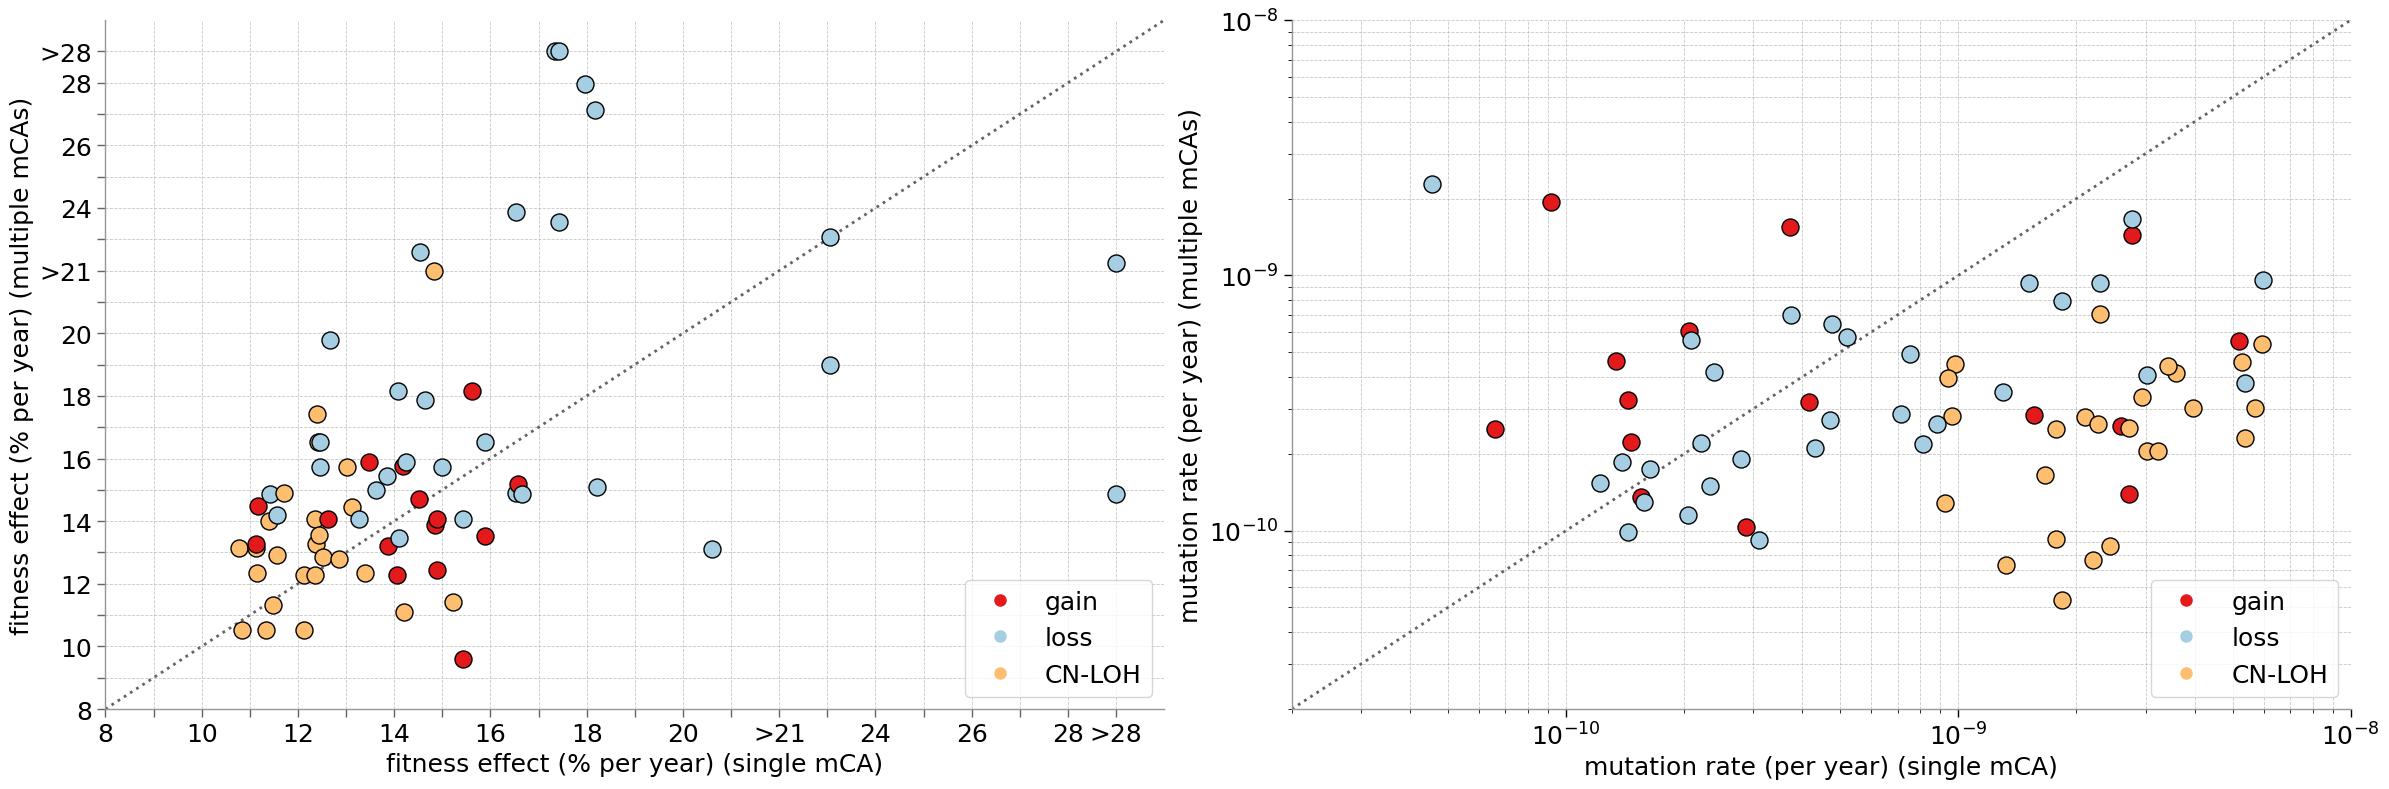

In [13]:
#plot single vs multiple fitness effects and mutation rates
fig, axes = plt.subplots(1, 2, figsize = (24, 8))

ax1 = axes[0]
ax2 = axes[1]

for mCA, v in single_mCA_s_mu_dict.items():
    single_s = float(v['s'])*100
    if mCA[-1]=='-':
        if single_s>28:
            single_s = 29
    if mCA[-1]=='=':
        if single_s >21:
            single_s = 22
    if mCA in multiple_mCA_s_mu_dict.keys():
        multiple_s = float(multiple_mCA_s_mu_dict[mCA]['s'])*100
        if mCA[-1]=='-':
            if multiple_s>28:
                multiple_s = 29
        if mCA[-1]=='=':
            if multiple_s >21:
                multiple_s = 22
                
        single_mu = float(v['mu'])
        multiple_mu = float(multiple_mCA_s_mu_dict[mCA]['mu'])
        color = mCA_color_dict[mCA[-1]]

        ax1.scatter(single_s, multiple_s, color = color, s = 150, lw = 1, edgecolor = 'k', zorder = 50)
        ax2.scatter(single_mu, multiple_mu, color = color, s = 150, lw = 1, edgecolor = 'k', zorder = 50)
    

ax1.plot([8, 30], [8, 30], lw = 2, linestyle = ':', color = grey4)
ax2.plot([2e-11, 1e-8], [2e-11, 1e-8], lw = 2, linestyle = ':', color = grey4)
    
ax1.set_xlim(8, 30)
ax1.set_ylim(8, 30)

ax2.set_xlim(2e-11, 1e-8)
ax2.set_ylim(2e-11,1e-8)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('fitness effect (% per year) (single mCA)', fontsize = 18)
ax1.set_ylabel('fitness effect (% per year) (multiple mCAs)', fontsize = 18)

ax2.set_xlabel('mutation rate (per year) (single mCA)', fontsize = 18)
ax2.set_ylabel('mutation rate (per year) (multiple mCAs)', fontsize = 18)

y_major_ticks = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
y_major_tick_labels = ["8", "", "10", "", "12", "", "14", "", "16", "", "18", "", "20", "", ">21", "", "24", "", "26", "", "28", ">28"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = 18)
ax1.set_xticks(y_major_ticks)
ax1.set_xticklabels(y_major_tick_labels, fontsize = 18)

ax1.tick_params(axis = 'both', which = 'major', color = grey4)
ax1.tick_params(axis = 'both', which='minor', bottom=False)

ax1.grid()
ax2.grid(which = 'both')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

custom_lines = [Line2D([0], [0], color=gain_color, lw=0, marker = 'o', markersize = 8),
               Line2D([0], [0], color=loss_color, lw=0, marker = 'o', markersize = 8),
               Line2D([0], [0], color=neutral_color, lw=0, marker = 'o', markersize = 8)]
ax1.legend(custom_lines, ['gain', 'loss', 'CN-LOH'], fontsize = 18, loc = 'lower right', fancybox = True, frameon = True)
ax2.legend(custom_lines, ['gain', 'loss', 'CN-LOH'], fontsize = 18, loc = 'lower right', fancybox = True, frameon = True)

plt.tight_layout()
# plt.savefig('Figures/Single_vs_multiple_mCAs.pdf')

plt.show()